In [143]:
import pandas as pd
# Pandas is a library that we use for data manipulations and DataFrames
import numpy as np
# Numpy is a library for mathematical operations and matrix manipulations

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
df=pd.read_csv('/content/drive/My Drive/iris_dataset.csv')


# **Seperating the Features and Labels**




In [146]:
y=df['flower']
x=df.drop('flower', axis=1)
x= x.values


In [147]:
# Iterate from 0 to the length of y (Labels)
for i in range(len(y)):
  # if the label is Iris Setosa assign a number 0 to it
  if y[i] == 'Iris-setosa':
    y[i]=0
    
  # if the label is Iris versicolor assign a number 1 to it
  elif y[i] == 'Iris-versicolor':
    y[i]=1
    
  # if the label is Iris Virginica assign a number 2 to it
  else:
    y[i]=2

#For each value of array type cast it to integer
y=np.array(y).astype(int)

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [148]:
from sklearn.model_selection import train_test_split
# Sklearn is the library for Machine Learning operations. Here train test split is used to seperate the data and labels into training set and testing set. 
# 0.5 shows that the testing size will comprise of 50% of whole data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, shuffle=True)

In [149]:
# OHE
def load_data(inputs,labels):

    labels = labels.reshape(-1,1)
    
    print("Shape of X = ",inputs.shape)
    print("Shape of Y = ",labels.shape)


    labels1 = np.zeros((labels.shape[0],3))
    for i in range(labels.shape[0]):
        labels1[i][labels[i][0]] = 1
    labels = labels1
    print("final shape of Y = ",labels.shape)
    return inputs,labels

In [150]:
X, Y = load_data(x_train, y_train)

Shape of X =  (112, 4)
Shape of Y =  (112, 1)
final shape of Y =  (112, 3)


In [151]:
Layers = 2
Features = X.shape[1]
DataPoints = X.shape[0]
output_nodes =[5,3]
activation_function = "sigmoid"


# **About Weights and Biases:**

we will be using Weights of 4x5 and 5x3 each and Biases of 5x3 and 1x3 respectively. The initialize function will initialize the weights and biases with random numbers.

In [152]:
def InitilizeWeightsandBiases():
    inp_size = Features
    parameters = {}

    for index,cur_op in enumerate(output_nodes):
        W_val = np.random.rand(inp_size,cur_op)
        W_key = "W"+str(index)
        B_val = np.random.rand(1,cur_op)
        B_key = "b"+str(index)
        inp_size = cur_op
        parameters[W_key] = W_val
        parameters[B_key] = B_val
        
    return parameters

**Since, we are dealing with multi class classification, we will be using Softmax for the output layer. The formula for softmax is:** 

Exponential of array / Sum of exponential of Array

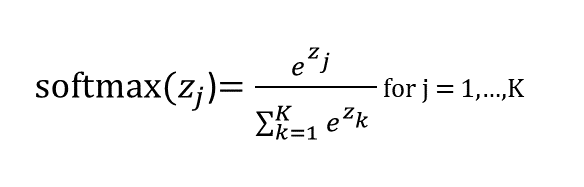

In [153]:

# softmax non-linearity , to be used in last layer of model 
def softmax(Arr,axis ):
    #e^arr
    arr = np.exp(Arr)
    dir_one = 1
    if axis == 1 : 
      dir_one = arr.shape[0]
    #Sum of e^j
    arr_sum = np.array(np.sum(arr,axis = axis)).reshape(dir_one,-1)
    
    # e^arr / #Sum of e^j
    arr = arr/arr_sum
    
    return arr

In [154]:
def tanh(Z):
  return np.tanh(Z)
def sigmoid(Z):
  return 1/(1 + np.exp(-Z))
def relu(x):
    return max(0.0, x)

# **We will run the forward propogation here:**
*Z = W X + b*


*A = Activation Function (Z)*

where activation function can be sigmoid, tanh or relu for all layers except the output layer. We are using softmax for output layer.

In [155]:
def feed_forward(X,parameters,show = False):
    A = X
    parameters["A0"] = A
    if show : print("A0 shape = ",A.shape)
    for i in range (Layers):
        wt_name = "W"+str(i)
        bias_name = "b"+str(i)
 
 
        wt = parameters[wt_name]
        b = parameters[bias_name]
 
 
        if show : 
          print(wt_name," shape = ",wt.shape)
          print(bias_name," shape = ",b.shape)
 
       #  Z = W A + B
        Z = np.dot(A,wt)
        Z_name = "Z"+str(i+1)

        if show : 
          print(Z_name," shape = ",Z.shape)
        
        Z = Z + b
        parameters[Z_name] = Z

        A_name = "A"+str(i+1)
        
        if i < Layers -1 : 
            if activation_function=="tanh":
                A = tanh(Z)
            elif activation_function=="sigmoid":
                A = sigmoid(Z)
            elif activation_function=="relu":
                A = relu(Z)
        else :
            A = softmax(Z,1)
        
        if show : 
          print(A_name," shape = ",A.shape)
        parameters[A_name] = A
    
    return A, parameters

# **Provided the Weights, Biases the dW, dB and learning rate, we will be updating parameters. We are using 0.001 Learning Rate by default.**

In [156]:
def update_parameters(W, B, dW, dB, learning_rate=0.001):
    
    # Update rule for each parameter
    W = W - learning_rate * dW
    B = B - learning_rate * dB

    return W , B

In [157]:

# Fuction to update weights and biases 
def update_weights(params,dA,learning_rate, show=False):
    # For each Layer
    for i in range(Layers):
        # Index for weights and biases
        cur = Layers - i -1 

        wt_name = "W"+str(cur)
        bias_name = "b"+str(cur)
        z_name = "Z"+str(cur+1)
        a_name = "A"+str(cur)
        a_next_name = "A"+str(cur+1)
        
        if show:
          print(wt_name," ",bias_name," ",z_name," ",a_name)
          print("dA shape = ",dA.shape)
          print(z_name," shape = ",params[z_name].shape)
          print(wt_name," shape = ",params[wt_name].shape)
          print(bias_name," shape = ",params[bias_name].shape)
          print(a_name," shape = ",params[a_name].shape)
          print(a_next_name," shape = ",params[a_next_name].shape)
          
        # Extarcting A[i], A[i+1], W and B
        a = params[a_name]
        a_next = params[a_next_name]
        wt = params[wt_name]
        bias = params[bias_name]

        # If this is first step no need to dZ will be equal to zA
        if i == 0 : 
            dZ = dA
        else:
            D_tmp = 1 - np.multiply(a_next,a_next)
            dZ = np.multiply(dA,D_tmp)

        DW =  1/DataPoints * np.dot(a.T,dZ)
        
        DB = 1/DataPoints * np.sum(dZ,axis = 0).reshape(1,-1)
        
        dA =  np.dot(dZ,wt.T)
        
        wt = wt - learning_rate*DW
        bias = bias - learning_rate*DB

        params[wt_name] = wt
        params[bias_name] = bias

    return params

In [158]:

# this will calculate accuracy and print that along with correct prediction 
def calculate_acc(A,Y):

    total_correct = 0

    for j in range(A.shape[0]):
        maxv = A[j][0]
        ind = 0

        for i in range( A.shape[1]):
            if maxv < A[j][i] :
                maxv = A[j][i]
                ind = i

        if Y[j][ind] == 1:
            total_correct = total_correct + 1
    
    acc =  ( total_correct / A.shape[0] ) * 100
    return acc

In [159]:
def train_model(X,Y,iterations,learning_rate = 0.01):
    cur_params = InitilizeWeightsandBiases()

    iters=[]
    accs=[]
    for i in range(iterations):
        
        a_out,cur_params = feed_forward(X,cur_params)

        acc = calculate_acc(a_out,Y)

        if i % 100 == 0 :
            print("Iteration ",i)
            print("Accuracy = ",acc,"%")
            print("Error = ",100-acc,"%")
            iters.append(i)
            accs.append(acc)
        if acc>97:
          DA = a_out - Y
          cur_params = update_weights(cur_params,DA,learning_rate)
          return cur_params, acc, iters, accs

        DA = a_out - Y


        cur_params = update_weights(cur_params,DA,learning_rate)
    return cur_params, acc, iters, accs

In [160]:
acc=0
while acc<90:
  my_final_params, acc, iters, accs = train_model(X,Y,5000,0.1)

Iteration  0
Accuracy =  30.357142857142854 %
Error =  69.64285714285714 %
Iteration  100
Accuracy =  38.392857142857146 %
Error =  61.607142857142854 %
Iteration  200
Accuracy =  68.75 %
Error =  31.25 %
Iteration  300
Accuracy =  62.5 %
Error =  37.5 %
Iteration  400
Accuracy =  61.60714285714286 %
Error =  38.39285714285714 %
Iteration  500
Accuracy =  62.5 %
Error =  37.5 %
Iteration  600
Accuracy =  64.28571428571429 %
Error =  35.71428571428571 %
Iteration  700
Accuracy =  66.07142857142857 %
Error =  33.92857142857143 %
Iteration  800
Accuracy =  83.03571428571429 %
Error =  16.964285714285708 %
Iteration  900
Accuracy =  83.03571428571429 %
Error =  16.964285714285708 %
Iteration  1000
Accuracy =  83.03571428571429 %
Error =  16.964285714285708 %
Iteration  1100
Accuracy =  85.71428571428571 %
Error =  14.285714285714292 %
Iteration  1200
Accuracy =  87.5 %
Error =  12.5 %
Iteration  1300
Accuracy =  89.28571428571429 %
Error =  10.714285714285708 %
Iteration  1400
Accuracy =  

In [161]:
print(my_final_params['W0'].shape)
print(my_final_params['W1'].shape)
print(my_final_params['b0'].shape)
print(my_final_params['b1'].shape)
print(my_final_params['A1'].shape)
print(my_final_params['A2'].shape)

(4, 5)
(5, 3)
(1, 5)
(1, 3)
(112, 5)
(112, 3)


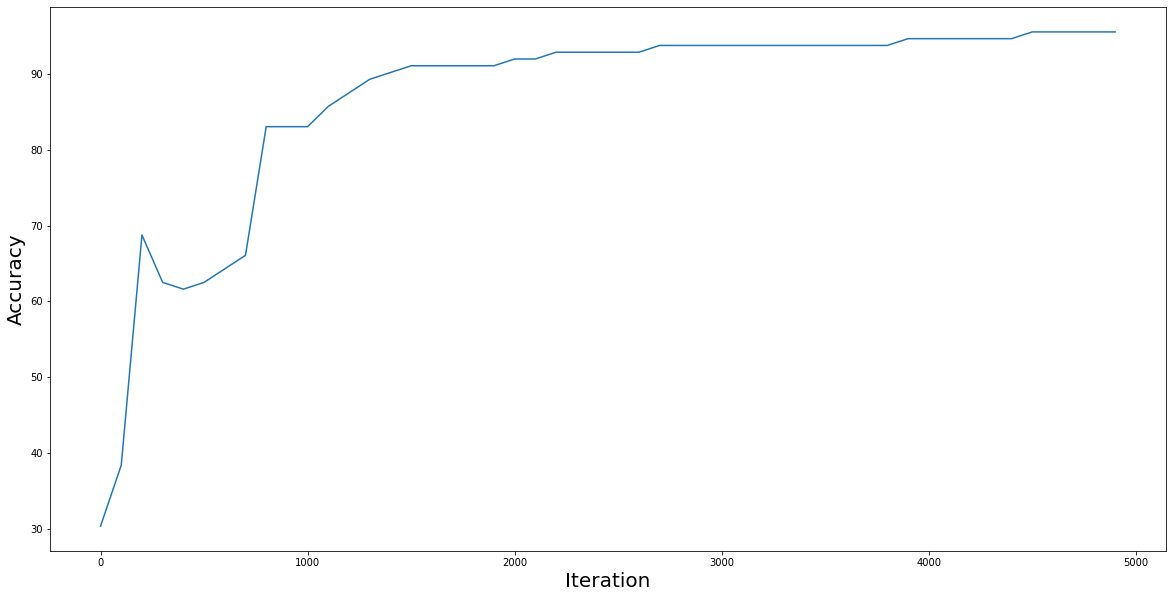

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(iters, accs)
plt.xlabel('Iteration', size=20)
plt.ylabel('Accuracy', size=20)
plt.show()

In [163]:
XTEST, YTEST = load_data(x_test, y_test)

Shape of X =  (38, 4)
Shape of Y =  (38, 1)
final shape of Y =  (38, 3)


In [164]:
a_out,test_params = feed_forward(XTEST,my_final_params)
calculate_acc(a_out,YTEST)


97.36842105263158